# Оптимизация маркетинговых затрат в Яндекс.Афише

# Описание проекта
Стажировка в отделе маркетинговой аналитики Яндекс.Афиши.  
Задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика  
и перераспределить бюджет.

## Загрузка данных и подготовка их к анализу

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

display(visits.head(10))
display(orders.head(10))
display(costs.head(10))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Выводы:

'visits':  
В таблице 5 столбцов, 359400 строк.  
В столбцах: 'End Ts' и 'Start Ts' тип object, приведем к datetimе.    
Пропусков нет.  

'orders':  
В таблице 3 столбца, 50415 строк.  
Столбец: 'Buy Ts' тип object, приведем к datetimе.    
Пропусков нет.  

'costs':  
В таблице 3 столбца, 2542 строк.  
Столбец: 'dt' тип object, приведем к datetimе.    
Пропусков нет.  

В двух таблицах в наименованиях столбцов пробелы заменим на нижнее подчеркивание и приведем к нижнему регистру

### Подготовка данных к анализу

In [2]:
visits = visits.rename(columns={'Device':'device', 'End Ts':'end_ts', 'Source Id':'source_id', 'Start Ts':'start_ts', 'Uid':'uid'})
orders = orders.rename(columns={'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'})

visits['end_ts'] = pd.to_datetime(visits['end_ts'])   #, format='%Y.%m.%d')
visits['start_ts'] = pd.to_datetime(visits['start_ts'])   #, format='%Y.%m.%d')

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])   #, format='%Y.%m.%d')

costs['dt'] = pd.to_datetime(costs['dt'])    #, format='%Y.%m.%d')

display(visits.head())
display(orders.head())

visits.info()
print()
orders.info()
print()
costs.info()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Выводы:

'visits':  
Столбцы: 'End Ts' и 'Start Ts' тип object приведены к формату datetimе.    
Пропусков нет.  

'orders':  
Столбец: 'Buy Ts' тип object приведен к формату datetimе.    
Пропусков нет.  

'costs':  
Столбец: 'dt' тип object приведен к формату datetimе.    
Пропусков нет.  

В двух таблицах в наименования столбцов пробелы заменены на нижнее подчеркивание и привены к нижнему регистру
    
Проблем с данными нет, данные готовы к анализу.

## Рассчеты метрик и построение графиков

### Продуктовые метрики

#### Рассчитываем DAU, WAU и MAU. Вычисляем средние значения этих метрик за весь период. Отображаем изменения метрик во времени на графиках

907

5716

23228

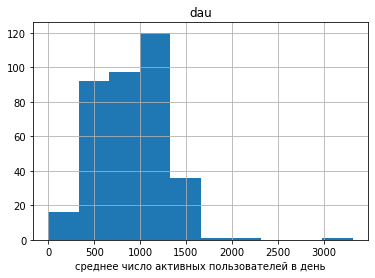

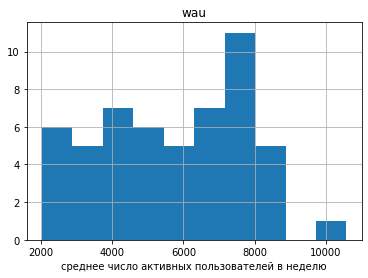

Text(0.5, 0, 'среднее число активных пользователей в месяц')

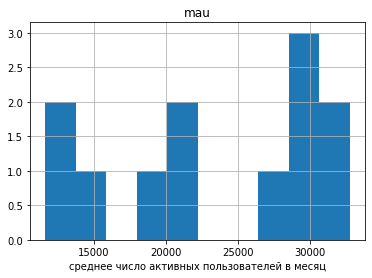

In [3]:
import matplotlib.pyplot as plt

visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

display(int(dau_total))
display(int(wau_total))
display(int(mau_total))

dau = visits.groupby('session_date').agg({'uid': 'nunique'})
dau.hist()
#plt.xlim([0, 200])
plt.title("dau")
plt.xlabel("среднее число активных пользователей в день")
plt.show()

wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau.hist()
#plt.xlim([0, 200])
plt.title("wau")
plt.xlabel("среднее число активных пользователей в неделю")
plt.show()

mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau.hist()
#plt.xlim([0, 200])
plt.title("mau")
plt.xlabel("среднее число активных пользователей в месяц")

Выводы:  
среднее число активных пользователей в день колеблется примерно от 450 человек, до 1450. Такой разбег возможно, обусловлен тем,
что в будние дни ресурсом наименьшее количество активнее пользуется в вечернее время после рабочего дня, а максимально значение пользователей достигается на выходных и в праздничные дни.
    
среднее число активных пользователей в неделю: на графике видна стабильная посещаемость в течении пяти рабочих дней от 2000 до 9000 человек, а так же всплеск (возможно на выходных) от 9500 до 11000.  

среднее число активных пользователей в месяц: наблюдаем значения от 11000 до 16000 человек, от 17000 до 23000 человек, 
а так же от 22000 до 34000.
    
DAU, WAU и MAU - это разные метрики. Если 7 раз сложить DAU, не получить WAU!
    
Таким образом, каждый временной период имеет разную диаграмму, так как количество дней в году больше чем кол-во недель,
и соответственно месяцев, а количество недель в году больше чем кол-во месяцев

#### Определяем, сколько раз за день пользователи в среднем заходят на сайт. Строим график, отражающий изменения метрики во времени

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


1.2178366978005424

1.0

Text(0.5, 0, 'кол-во раз за день пользователи в среднем заходят на сайт')

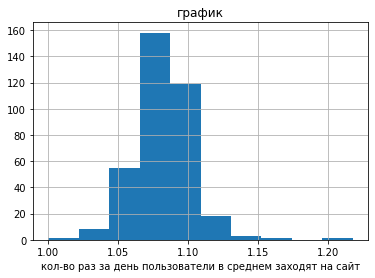

In [4]:
session_per_dau = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
session_per_dau.columns = ['n_sessions', 'n_users']
session_per_dau['sessions_per_user'] = session_per_dau['n_sessions'] / session_per_dau['n_users']
display(session_per_dau.head())
display(session_per_dau['sessions_per_user'].max())
display(session_per_dau['sessions_per_user'].min())
session_per_dau['sessions_per_user'].hist()
#plt.xlim([0, 200])
plt.title("график")
plt.xlabel("кол-во раз за день пользователи в среднем заходят на сайт")

Выводы:  
Ежедневно один пользователь в среднем один раз заходит на сайт.

#### Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения.

643.506488592098

0    60
dtype: int64

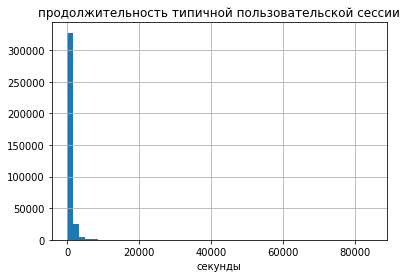

In [5]:
#Найдём ASL(англ. average session length) показывает, 
#сколько длится сессия пользователя в среднем — посчитаем длину всех сессий и вычислим среднее:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
display(visits['session_duration_sec'].mean())
#взглянем на распределение:
visits['session_duration_sec'].hist(bins=50)
plt.title("продолжительность типичной пользовательской сессии")
plt.xlabel("секунды")
#Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану.
#Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего):
display(visits['session_duration_sec'].mode())

Вывод:  
типичная сессия длиться до 60 секунд.  
Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, поэтому рассчитаем моду (значение в выборке, которое встречается чаще всего)

#### Рассчитываем Retention Rate, применяя когортный анализ. Показываем изменения метрики во времени на графике. Находим средний Retention Rate на второй месяц «жизни» когорт.

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
month_first_start_ts,,,,,,,,,,,
2017-06-01,7.866355,5.377479,6.139226,6.855721,7.142318,6.101516,5.777208,5.234181,5.083340,4.065163,4.49506
2017-07-01,5.608828,5.129376,5.616438,5.821918,4.817352,4.535769,4.573820,3.881279,2.861492,2.747336,NaN
2017-08-01,7.690797,6.286219,6.276397,5.009331,4.400354,3.634221,3.948532,2.789510,2.602888,NaN,NaN
2017-09-01,8.548851,6.920498,5.070642,3.939176,3.783525,3.585967,2.418582,2.280891,NaN,NaN,NaN
2017-10-01,7.860800,5.223852,3.895754,3.426108,3.222081,2.136505,2.036417,NaN,NaN,NaN,NaN


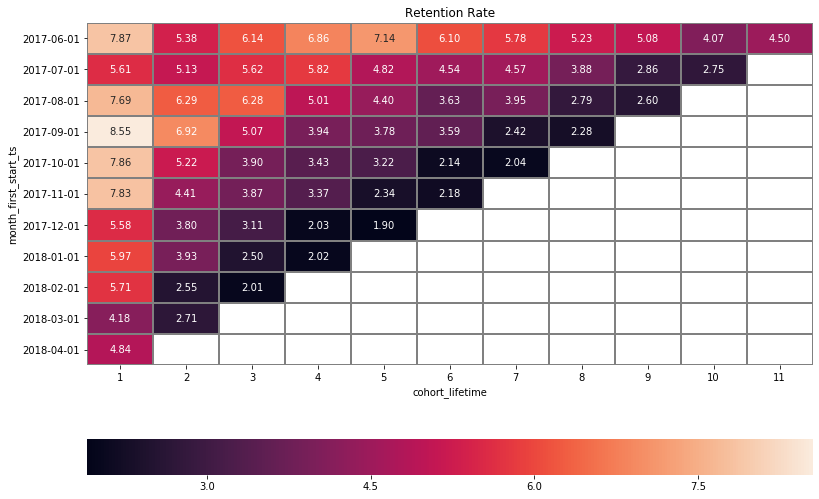

6.5167

In [6]:
#display(visits.head())

#получим дату первого заказа:
first_order_date_by_customers1 = visits.groupby('uid')['start_ts'].min()
#display(first_order_date_by_customers1.head())

#изменим имя Series:
first_order_date_by_customers1.name = 'first_start_ts'
#display(first_order_date_by_customers1.head())

#Методом join() объединим:
visits = visits.join(first_order_date_by_customers1, on='uid')
#display(visits.head(10))

#выделим из столбцов месяцы:
visits['month_start_ts'] = visits['start_ts'].astype('datetime64[M]')
visits['month_first_start_ts'] = visits['first_start_ts'].astype('datetime64[M]')
#display(visits.head())

#Найдём lifetime когорты:
visits['cohort_lifetime'] = (visits['month_start_ts'] - visits['month_first_start_ts'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = (visits['cohort_lifetime'].round().astype('int'))
#display(visits.head())

#Сгруппируем данные по когорте и lifetime. 
#Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:
cohorts1 = visits.groupby(['month_first_start_ts','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#display(cohorts1.head())

#Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте,
#и на него разделить число пользователей в каждый следующий месяц.
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:
initial_visits = cohorts1[cohorts1['cohort_lifetime'] == 0][['month_first_start_ts', 'uid']]
#display(initial_visits)

#Переименуем столбец uid в cohort_users методом rename():
initial_visits = initial_visits.rename(columns={'uid':'cohort_users'})
#display(initial_orders)

#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts1 = cohorts1.merge(initial_visits,on='month_first_start_ts')
#display(cohorts)

#рассчитаем Retention Rate.
#Разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте:
cohorts1['retention'] = cohorts1['uid']/cohorts1['cohort_users']
cohorts1['retention'] = cohorts1['retention']*100
#display(cohorts1)

#убираем "нули":
cohorts1['month_first_start_ts'] = pd.to_datetime(cohorts1['month_first_start_ts'], format='%Y-%m-%d')

#убираем нулевой месяц:
cohorts1_no_0 = cohorts1[cohorts1['cohort_lifetime'] != 0]
#display(cohorts_no_0)
                  
#Построим сводную таблицу и создадим тепловую карту:
retention_pivot1 = cohorts1_no_0.pivot_table(index='month_first_start_ts', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot1.reset_index()

display(retention_pivot1.head())

plt.figure(figsize=(13, 9))
sns.heatmap(retention_pivot1, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='Retention Rate', yticklabels = retention_pivot1.index.astype('str'))
plt.show()

display(round(retention_pivot1[1].mean(),4))

Выводы:  
Общая тенденция с августа Retention Rate убывает в каждый последующий месяц, возможно это связано с периодом летних отпусков. 
Средний Retention Rate на второй месяц «жизни» когорт составляет от 1.6% до 3.9%


### Метрики электронной коммерции

####  Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. 

10428.81999404939

0    0
dtype: int64

count    50415.000000
mean     10428.819994
std      23367.909320
min          0.000000
25%          0.000000
50%          0.000000
75%       2640.000000
max      86340.000000
Name: session_time_sec, dtype: float64

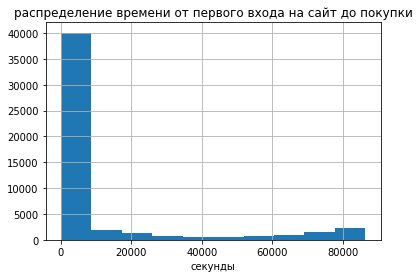

In [7]:
#display(orders.head(10))

#получим дату первого заказа:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
#display(first_order_date_by_customers.head())

#изменим имя Series - buy_ts на first_buy_ts
first_order_date_by_customers.name = 'first_buy_ts'

#Методом join() объединим датафрейм orders и Series first_order_date_by_customers по столбцу 'uid':
orders = orders.join(first_order_date_by_customers, on='uid')
#display(orders.head(10))

#Следующим шагом выделим из столбцов first_buy_ts и buy_ts месяцы:
orders['first_buy_ts_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders['buy_ts_month'] = orders['buy_ts'].astype('datetime64[M]')
#display(orders.head())

orders['session_time_sec'] = (orders['buy_ts'] - orders['first_buy_ts']).dt.seconds
display(orders['session_time_sec'].mean())

orders['session_time_sec'].hist()
plt.title("распределение времени от первого входа на сайт до покупки")
plt.xlabel("секунды")
display(orders['session_time_sec'].mode())
orders['session_time_sec'].describe()

Выводы:   
распределение не похоже на нормальное, поэтому рассчитаем моду (значение в выборке, которое встречается чаще всего).  
в среднем проходит чуть меньше 3 часов с момента первого посещения сайта до совершения покупки

####  Применяя когортный анализ или другой метод, рассчитываем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев

In [8]:
#display(orders.head(10))
orders['month'] = pd.DatetimeIndex(orders['buy_ts_month']).month   
#display(orders.head(10))
six_month = orders[(orders['month'] >= 0) & (orders['month'] <= 5)]
display(six_month.head())
display(six_month.groupby('buy_ts').agg({'uid': 'nunique'}).mean())

,buy_ts,revenue,uid,first_buy_ts,first_buy_ts_month,buy_ts_month,session_time_sec,month
27467,2018-01-01 00:42:00,4.89,7888114508400587928,2018-01-01 00:42:00,2018-01-01,2018-01-01,0,1
27468,2018-01-01 00:43:00,2.22,15988184777168316614,2018-01-01 00:43:00,2018-01-01,2018-01-01,0,1
27469,2018-01-01 01:02:00,2.44,10118116578016544008,2017-09-08 10:15:00,2017-09-01,2018-01-01,53220,1
27470,2018-01-01 01:20:00,1.22,17341622726390456384,2018-01-01 01:20:00,2018-01-01,2018-01-01,0,1
27471,2018-01-01 02:45:00,2.22,15988184777168316614,2018-01-01 00:43:00,2018-01-01,2018-01-01,7320,1


uid    1.098994
dtype: float64

Выводы:  
один покупатель в среднем за 6 месяцев совершает одну покупку

####  Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не применяем — он может исказить расчёты. Строим график, отражающий изменения метрики во времени

Средний чек, USD:


5

Text(0, 0.5, 'средний чек')

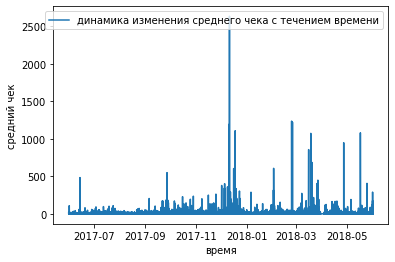

In [9]:
import matplotlib.pyplot as plt
#display(orders.head())
print('Средний чек, USD:')
display(orders['revenue'].mean().round().astype('int'))

#orders['revenue'].hist()
#plt.title("средний чек")
#plt.xlabel("USD")

plt.plot(orders['buy_ts'], orders['revenue'], label='динамика изменения среднего чека с течением времени')
plt.legend()
plt.xlabel("время")
plt.ylabel("средний чек")


Основной средний чек составляет примерно 5USD, но есть выбросы, скорее всего связанные с крупными покупками и/или покупками в   
праздничные дни, это особенно видно: всплеск в декабре 2017 - январе 2018 (новогодние праздники), а так же в марте 2018 (8 марта), и в мае   
2018 (длительные майские праздники)

####  Выясняем, как меняется LTV на покупателя по когортам. Помним, что LTV — накопительная метрика. Рассчитываем средний LTV по когортам за 6 месяцев; в расчёт включаем когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отражаем изменения метрики во времени на графике

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772


47.47877904102817


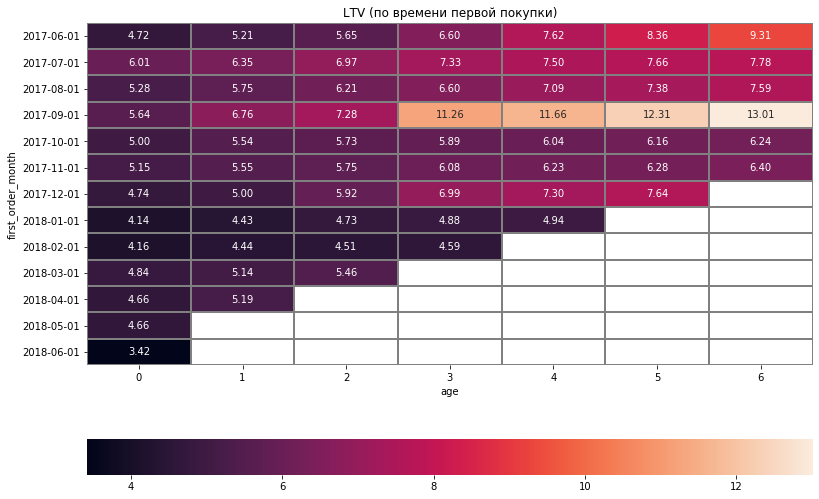

In [10]:
#display(orders.head())

#Выделим месяцы из дат в таблицах с заказами и расходами:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

#Получим месяц первой покупки каждого покупателя:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#print(first_orders.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = (first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new = pd.merge(orders,first_orders, on='uid')
#print(orders_new.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts2 = (orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts2.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts2, on='first_order_month')
#print(report.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
#print(report.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report['ltv'] = report['gp'] / report['n_buyers']
#display(report)

#делаем срез на 6 месяцев
report_six_month = report[(report['age'] <= 6)]
#display(report_six_month.head())


output = report_six_month.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1)   #.round()
#output.fillna('')
display(output.head())


#Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам:
ltv_20170601 = output.loc['2017-06-01'].sum()
print(ltv_20170601)

plt.figure(figsize=(13, 9))
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV (по времени первой покупки)', yticklabels = output.index.astype('str'))
plt.show()

Выводы:    
наибольшую прибыль и в течении более короткого периода приносит сентябрьская когорта.  
Июньская когорта по продолжительности более "старая", но приносит меньше прибыли и динамика по сравнению с сентябрьской меньше.

### Маркетинговые метрики

####  Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени

общая сумма расходов на маркетинг: 329131.62
Сумма расходов по каждому источнику на маркетинг: source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


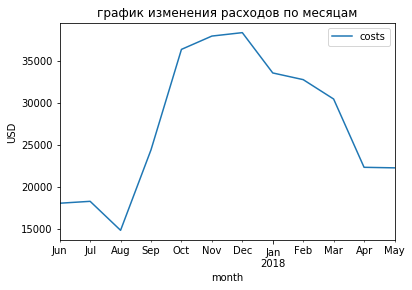

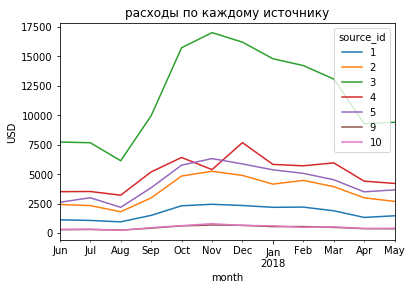

In [11]:
#display(costs.head())

#общая сумма расходов на маркетинг:
print('общая сумма расходов на маркетинг:', costs['costs'].sum())

#сумма расходов по источникам:
print('Сумма расходов по каждому источнику на маркетинг:',costs.groupby('source_id')['costs'].sum())

#выделяем месяц:
costs['month'] = costs['dt'].astype('datetime64[M]')
#display(costs.head())

#делаем сводную по месяцу и график по всем расходам:
costs.pivot_table(index='month', values='costs', aggfunc='sum').plot()
plt.title("график изменения расходов по месяцам")
plt.ylabel("USD")
plt.show()

#делаем сводную по месяцу и по каждому источнику и график:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot()
plt.title("расходы по каждому источнику")
plt.ylabel("USD")
plt.show()

Выводы:  
1. график изменения расходов по месяцам: с августа месяца наблюдает рост расходов,
    скоррее всего такой рост обусловлен такими факторами как: подготовка к школе, завершение летних каникул,
    выход на работу. И рост продлевается переходя к концу года, соответственно подготовка к Ному году, к длительным праздникам,
    покупка подарков, новогодние скидки и распродажи.
2. расходы по каждому источнику: динамика каждого источника аналогична динимике совокупных расходов.  
   Отдельно можно выделить источник № 3, как самый высокий.

####  Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках

средний САС:


9.01

LTV одного покупателя = 47.47877904102817
CAC одного покупателя = 8.905091448344043


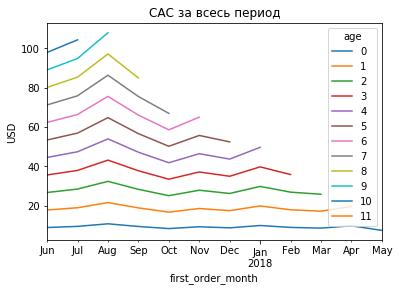

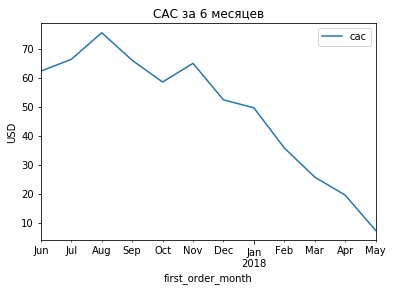

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,216,2017-06-01,1249.21,1249.21,0,5.783380,30,1125.61,5.211157
1,2017-06-01,216,2017-07-01,216.92,216.92,1,1.004259,30,1125.61,5.211157
2,2017-06-01,216,2017-08-01,250.11,250.11,2,1.157917,30,1125.61,5.211157
3,2017-06-01,216,2017-09-01,625.98,625.98,3,2.898056,30,1125.61,5.211157
4,2017-06-01,216,2017-10-01,391.22,391.22,4,1.811204,30,1125.61,5.211157


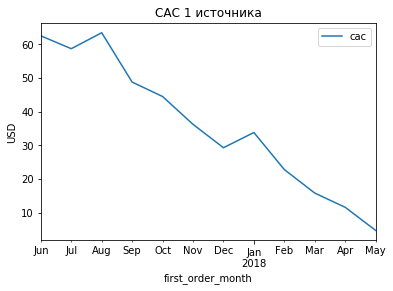

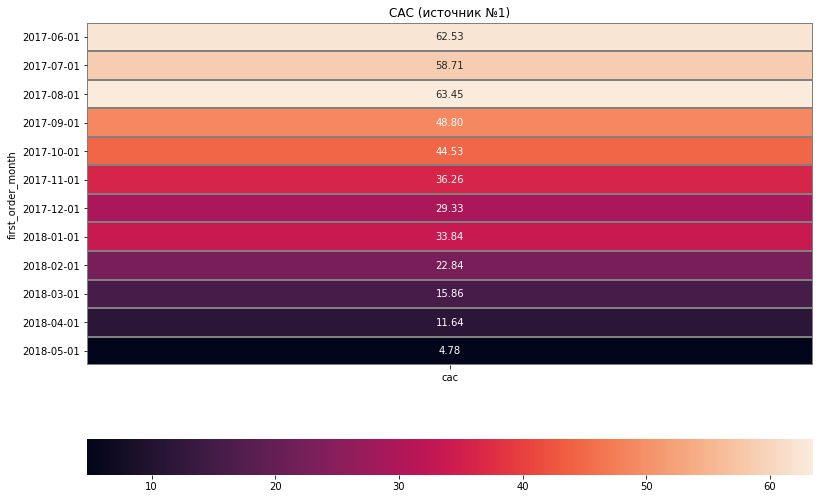

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,274,2017-06-01,1517.07,1517.07,0,5.536752,60,2427.38,8.859051
1,2017-06-01,274,2017-07-01,51.49,51.49,1,0.187920,60,2427.38,8.859051
2,2017-06-01,274,2017-08-01,66.50,66.50,2,0.242701,60,2427.38,8.859051
3,2017-06-01,274,2017-09-01,275.16,275.16,3,1.004234,60,2427.38,8.859051
4,2017-06-01,274,2017-10-01,345.26,345.26,4,1.260073,60,2427.38,8.859051


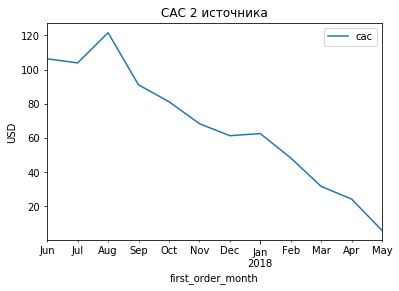

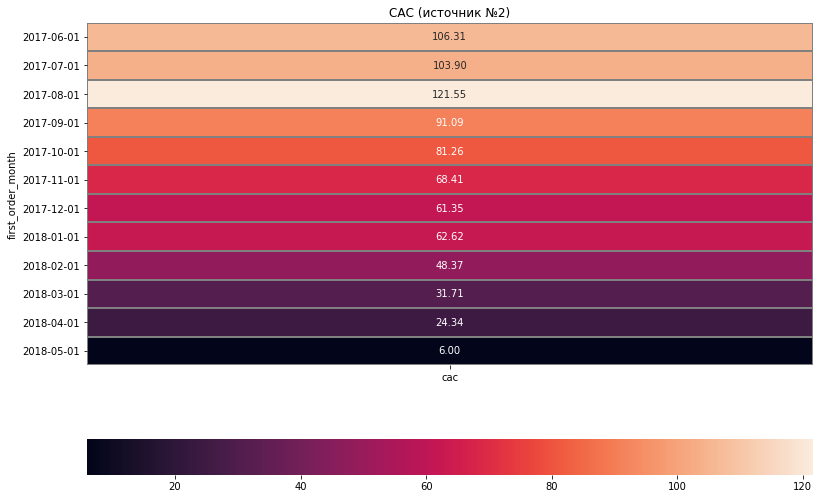

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,573,2017-06-01,2442.17,2442.17,0,4.262077,90,7731.65,13.493281
1,2017-06-01,573,2017-07-01,70.76,70.76,1,0.123490,90,7731.65,13.493281
2,2017-06-01,573,2017-08-01,65.50,65.50,2,0.114311,90,7731.65,13.493281
3,2017-06-01,573,2017-09-01,72.96,72.96,3,0.127330,90,7731.65,13.493281
4,2017-06-01,573,2017-10-01,58.23,58.23,4,0.101623,90,7731.65,13.493281


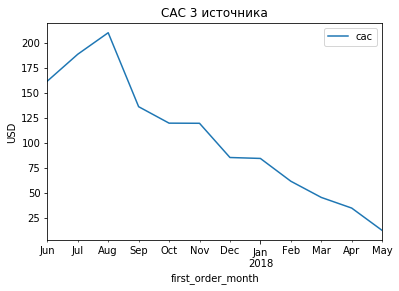

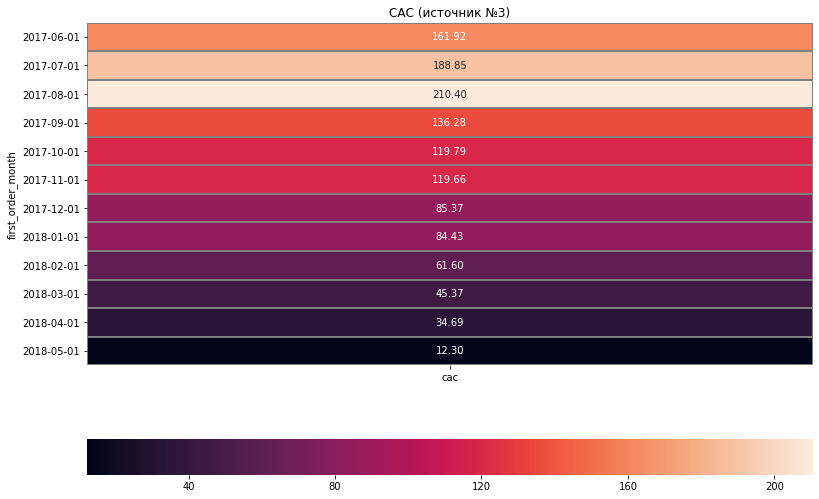

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,408,2017-06-01,1905.97,1905.97,0,4.671495,120,3514.8,8.614706
1,2017-06-01,408,2017-07-01,142.80,142.80,1,0.350000,120,3514.8,8.614706
2,2017-06-01,408,2017-08-01,86.59,86.59,2,0.212230,120,3514.8,8.614706
3,2017-06-01,408,2017-09-01,503.08,503.08,3,1.233039,120,3514.8,8.614706
4,2017-06-01,408,2017-10-01,262.43,262.43,4,0.643211,120,3514.8,8.614706


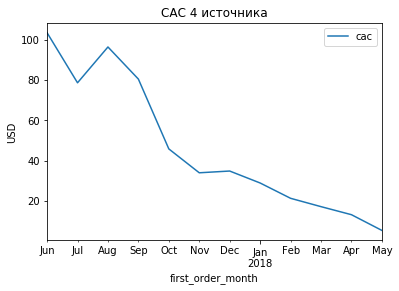

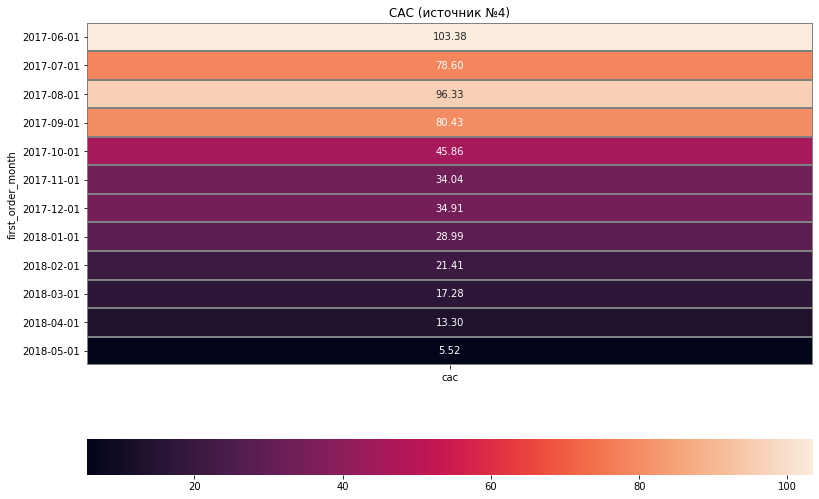

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,381,2017-06-01,1979.15,1979.15,0,5.194619,150,2616.12,6.866457
1,2017-06-01,381,2017-07-01,494.60,494.60,1,1.298163,150,2616.12,6.866457
2,2017-06-01,381,2017-08-01,408.33,408.33,2,1.071732,150,2616.12,6.866457
3,2017-06-01,381,2017-09-01,441.47,441.47,3,1.158714,150,2616.12,6.866457
4,2017-06-01,381,2017-10-01,1004.53,1004.53,4,2.636562,150,2616.12,6.866457


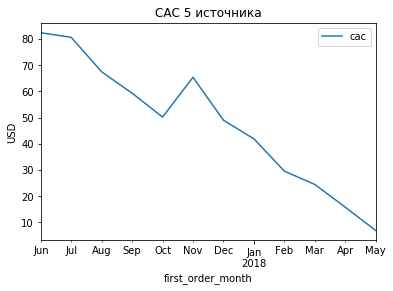

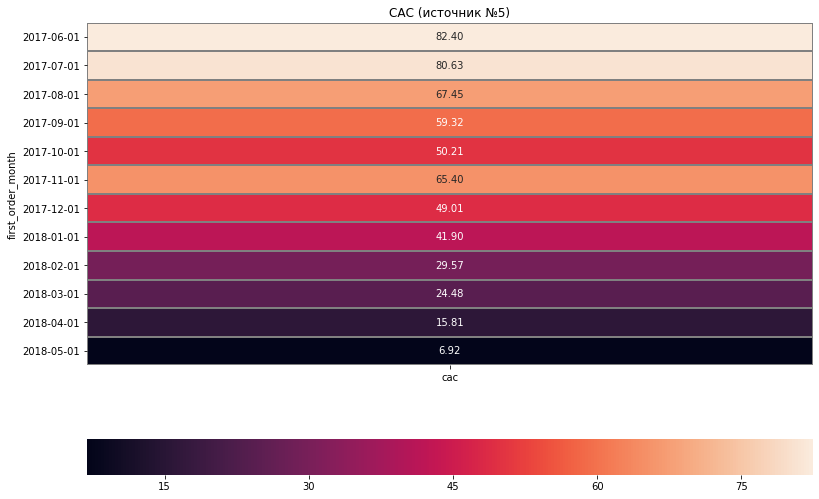

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,88,2017-06-01,284.72,284.72,0,3.235455,270,285.22,3.241136
1,2017-06-01,88,2017-07-01,2.81,2.81,1,0.031932,270,285.22,3.241136
2,2017-06-01,88,2017-08-01,8.31,8.31,2,0.094432,270,285.22,3.241136
3,2017-06-01,88,2017-09-01,12.65,12.65,3,0.143750,270,285.22,3.241136
4,2017-06-01,88,2017-10-01,6.54,6.54,4,0.074318,270,285.22,3.241136


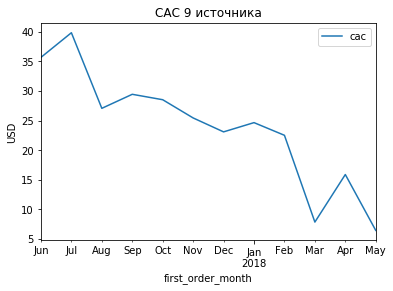

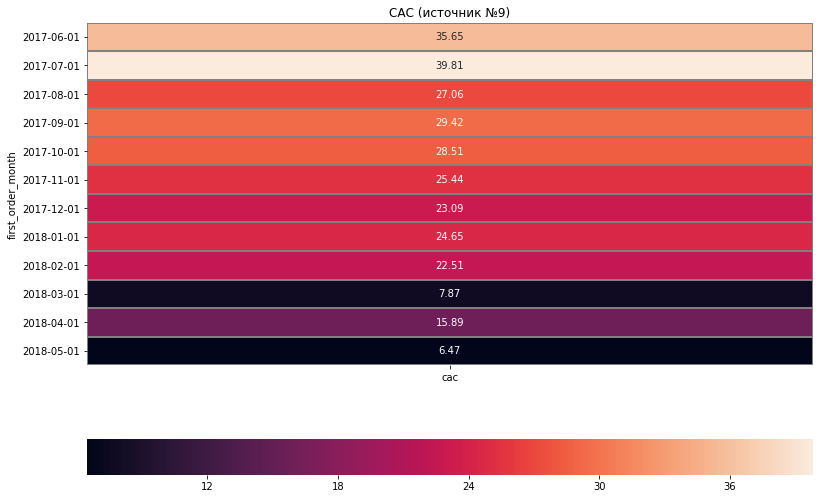

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,83,2017-06-01,179.20,179.20,0,2.159036,300,314.22,3.785783
1,2017-06-01,83,2017-07-01,2.44,2.44,1,0.029398,300,314.22,3.785783
2,2017-06-01,83,2017-10-01,0.37,0.37,4,0.004458,300,314.22,3.785783
3,2017-06-01,83,2018-02-01,3.67,3.67,8,0.044217,300,314.22,3.785783
4,2017-06-01,83,2018-05-01,3.67,3.67,11,0.044217,300,314.22,3.785783


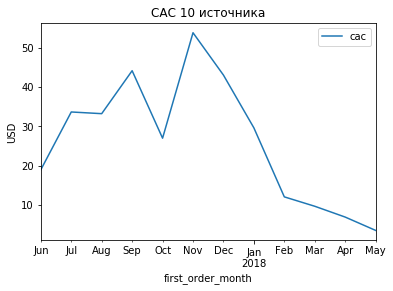

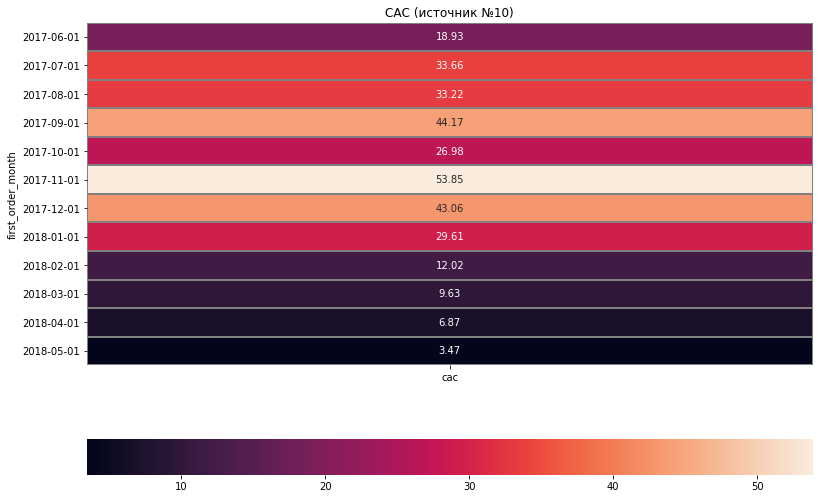

In [12]:
#посчитаем средний САС:
print('средний САС:')
display(round(costs['costs'].sum() / orders['uid'].nunique(), 2))

#Посчитаем CAC для первой когорты. Поделим расходы за этот месяц на количество людей в когорте:
# отфильруем нужную когорту
cohort_20170601 = report[report['first_order_month'] == '2017-06-01']
#display(cohort_20170601.head())

# посчитаем расходы за этот месяц
costs['month'] = costs['dt'].astype('datetime64[M]')
costs_20170601 = costs[costs['month'] == '2017-06-01']['costs'].sum()
#display(costs_20170601)

n_buyers_20170601 = cohort_20170601['n_buyers'][0]
cac_20170601 = costs_20170601 / n_buyers_20170601

print('LTV одного покупателя =', ltv_20170601)
print('CAC одного покупателя =', cac_20170601)

#_______________________________________________________________________________

#Посчитаем CAC каждой когорты
monthly_costs = costs.groupby('month').sum()
#display(monthly_costs.head())


#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
#display(report_new.head(5))

#делаем сводную и график:
report_new.pivot_table(index='first_order_month', columns='age', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС за всесь период")
plt.ylabel("USD")
plt.show()

#output_0 = report_new.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
#plt.figure(figsize=(13, 9))
#sns.heatmap(output_10, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            #).set(title ='CAC (источник №10)', yticklabels = output_10.index.astype('str'))
#plt.show()

#делаем срез на 6 месяцев:
report_new_six_month = report_new[(report_new['age'] <= 6)]
#display(report_new_six_month.head())

#делаем сводную и график за 6 месяцев:
report_new_six_month.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС за 6 месяцев")
plt.ylabel("USD")
plt.show()

#_________________________________________________________________________________________

#display(visits.head())
#делаем сводные и графики в разрезе источников:
users = visits.sort_values('first_start_ts').groupby('uid').first()
#display(users.head())
users.reset_index()
users2 = users['source_id']
users2.name = 'istochnik'
#display(users2.head())
orders = orders.join(users2, on='uid')
#display(orders.head())

#источник №1:
orders_1 = orders[orders['istochnik'] == 1]
#display(orders_1)

#Получим месяц первой покупки каждого покупателя:
first_orders_1 = orders_1.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_1.columns = ['uid', 'first_order_month']
#print(first_orders_1.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_1 = (first_orders_1.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_1.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_1.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new_1 = pd.merge(orders_1,first_orders_1, on='uid')
#print(orders_new_1.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts_1 = (orders_new_1.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts_1.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_1 = pd.merge(cohort_sizes_1, cohorts_1, on='first_order_month')
#print(report_1.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report_1['gp'] = report_1['revenue'] * margin_rate
report_1['age'] = (report_1['order_month'] - report_1['first_order_month']) / np.timedelta64(1, 'M')
report_1['age'] = report_1['age'].round().astype('int')
#print(report_1.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report_1['ltv'] = report_1['gp'] / report_1['n_buyers']
#print(report_1.head())

#Посчитаем CAC каждой когорты в разрезе источника
#display(costs.head())
costs_1 = costs[costs['source_id'] == 1]
#display(costs_1.head())
monthly_costs_1 = costs_1.groupby('month').sum()
#display(monthly_costs_1.head())

#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new_1 = pd.merge(report_1, monthly_costs_1, left_on='first_order_month', right_on='month')
report_new_1['cac'] = report_new_1['costs'] / report_new_1['n_buyers']
display(report_new_1.head())

report_new_1.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС 1 источника")
plt.ylabel("USD")
plt.show()

output_1 = report_new_1.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
sns.heatmap(output_1, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC (источник №1)', yticklabels = output_1.index.astype('str'))
plt.show()

#________________________________________________________________________________________________________


#источник №2:
orders_2 = orders[orders['istochnik'] == 2]
#display(orders_2)

#Получим месяц первой покупки каждого покупателя:
first_orders_2 = orders_2.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_2.columns = ['uid', 'first_order_month']
#print(first_orders_1.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_2 = (first_orders_2.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_2.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_2.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new_2 = pd.merge(orders_2,first_orders_2, on='uid')
#print(orders_new_1.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts_2 = (orders_new_2.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts_2.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_2 = pd.merge(cohort_sizes_2, cohorts_2, on='first_order_month')
#print(report_1.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report_2['gp'] = report_2['revenue'] * margin_rate
report_2['age'] = (report_2['order_month'] - report_2['first_order_month']) / np.timedelta64(1, 'M')
report_2['age'] = report_2['age'].round().astype('int')
#print(report_2.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report_2['ltv'] = report_2['gp'] / report_2['n_buyers']
#print(report_2.head())

#Посчитаем CAC каждой когорты в разрезе источника
#display(costs.head())
costs_2 = costs[costs['source_id'] == 2]
#display(costs_2.head())
monthly_costs_2 = costs_2.groupby('month').sum()
#display(monthly_costs_2.head())

#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new_2 = pd.merge(report_2, monthly_costs_2, left_on='first_order_month', right_on='month')
report_new_2['cac'] = report_new_2['costs'] / report_new_2['n_buyers']
display(report_new_2.head())

report_new_2.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС 2 источника")
plt.ylabel("USD")
plt.show()

output_2 = report_new_2.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
sns.heatmap(output_2, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC (источник №2)', yticklabels = output_2.index.astype('str'))
plt.show()

#__________________________________________________________________________________________________________

#источник №3:
orders_3 = orders[orders['istochnik'] == 3]
#display(orders_3)

#Получим месяц первой покупки каждого покупателя:
first_orders_3 = orders_3.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_3.columns = ['uid', 'first_order_month']
#print(first_orders_3.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_3 = (first_orders_3.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_3.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_3.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new_3 = pd.merge(orders_3,first_orders_3, on='uid')
#print(orders_new_3.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts_3 = (orders_new_3.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts_3.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_3 = pd.merge(cohort_sizes_3, cohorts_3, on='first_order_month')
#print(report_3.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report_3['gp'] = report_3['revenue'] * margin_rate
report_3['age'] = (report_3['order_month'] - report_3['first_order_month']) / np.timedelta64(1, 'M')
report_3['age'] = report_3['age'].round().astype('int')
#print(report_3.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report_3['ltv'] = report_3['gp'] / report_3['n_buyers']
#print(report_3.head())

#Посчитаем CAC каждой когорты в разрезе источника
#display(costs.head())
costs_3 = costs[costs['source_id'] == 3]
#display(costs_3.head())
monthly_costs_3 = costs_3.groupby('month').sum()
#display(monthly_costs_3.head())

#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new_3 = pd.merge(report_3, monthly_costs_3, left_on='first_order_month', right_on='month')
report_new_3['cac'] = report_new_3['costs'] / report_new_3['n_buyers']
display(report_new_3.head())

report_new_3.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС 3 источника")
plt.ylabel("USD")
plt.show()

output_3 = report_new_3.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
sns.heatmap(output_3, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC (источник №3)', yticklabels = output_3.index.astype('str'))
plt.show()

#_____________________________________________________________________________________________________________

#источник №4:
orders_4 = orders[orders['istochnik'] == 4]
#display(orders_4)

#Получим месяц первой покупки каждого покупателя:
first_orders_4 = orders_4.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_4.columns = ['uid', 'first_order_month']
#print(first_orders_4.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_4 = (first_orders_4.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_4.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_4.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new_4 = pd.merge(orders_4,first_orders_4, on='uid')
#print(orders_new_4.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts_4 = (orders_new_4.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts_4.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_4 = pd.merge(cohort_sizes_4, cohorts_4, on='first_order_month')
#print(report_1.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report_4['gp'] = report_4['revenue'] * margin_rate
report_4['age'] = (report_4['order_month'] - report_4['first_order_month']) / np.timedelta64(1, 'M')
report_4['age'] = report_4['age'].round().astype('int')
#print(report_4.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report_4['ltv'] = report_4['gp'] / report_4['n_buyers']
#print(report_4.head())

#Посчитаем CAC каждой когорты в разрезе источника
#display(costs.head())
costs_4 = costs[costs['source_id'] == 4]
#display(costs_4.head())
monthly_costs_4 = costs_4.groupby('month').sum()
#display(monthly_costs_4.head())

#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new_4 = pd.merge(report_4, monthly_costs_4, left_on='first_order_month', right_on='month')
report_new_4['cac'] = report_new_4['costs'] / report_new_4['n_buyers']
display(report_new_4.head())

report_new_4.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС 4 источника")
plt.ylabel("USD")
plt.show()

output_4 = report_new_4.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
sns.heatmap(output_4, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC (источник №4)', yticklabels = output_4.index.astype('str'))
plt.show()

#___________________________________________________________________________________________

#источник №5:
orders_5 = orders[orders['istochnik'] == 5]
#display(orders_5)

#Получим месяц первой покупки каждого покупателя:
first_orders_5 = orders_5.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_5.columns = ['uid', 'first_order_month']
#print(first_orders_5.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_5 = (first_orders_5.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_5.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_5.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new_5 = pd.merge(orders_5,first_orders_5, on='uid')
#print(orders_new_5.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts_5 = (orders_new_5.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts_5.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_5 = pd.merge(cohort_sizes_5, cohorts_5, on='first_order_month')
#print(report_5.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report_5['gp'] = report_5['revenue'] * margin_rate
report_5['age'] = (report_5['order_month'] - report_5['first_order_month']) / np.timedelta64(1, 'M')
report_5['age'] = report_5['age'].round().astype('int')
#print(report_5.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report_5['ltv'] = report_5['gp'] / report_5['n_buyers']
#print(report_5.head())

#Посчитаем CAC каждой когорты в разрезе источника
#display(costs.head())
costs_5 = costs[costs['source_id'] == 5]
#display(costs_5.head())
monthly_costs_5 = costs_5.groupby('month').sum()
#display(monthly_costs_5.head())

#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new_5 = pd.merge(report_5, monthly_costs_5, left_on='first_order_month', right_on='month')
report_new_5['cac'] = report_new_5['costs'] / report_new_5['n_buyers']
display(report_new_5.head())

report_new_5.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС 5 источника")
plt.ylabel("USD")
plt.show()

output_5 = report_new_5.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
sns.heatmap(output_5, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC (источник №5)', yticklabels = output_5.index.astype('str'))
plt.show()

#__________________________________________________________________________________________________________


#источник №9:
orders_9 = orders[orders['istochnik'] == 9]
#display(orders_9)

#Получим месяц первой покупки каждого покупателя:
first_orders_9 = orders_9.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_9.columns = ['uid', 'first_order_month']
#print(first_orders_9.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_9 = (first_orders_9.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_9.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_9.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new_9 = pd.merge(orders_9,first_orders_9, on='uid')
#print(orders_new_9.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts_9 = (orders_new_9.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts_9.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_9 = pd.merge(cohort_sizes_9, cohorts_9, on='first_order_month')
#print(report_9.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report_9['gp'] = report_9['revenue'] * margin_rate
report_9['age'] = (report_9['order_month'] - report_9['first_order_month']) / np.timedelta64(1, 'M')
report_9['age'] = report_9['age'].round().astype('int')
#print(report_9.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report_9['ltv'] = report_9['gp'] / report_9['n_buyers']
#print(report_9.head())

#Посчитаем CAC каждой когорты в разрезе источника
#display(costs.head())
costs_9 = costs[costs['source_id'] == 9]
#display(costs_9.head())
monthly_costs_9 = costs_9.groupby('month').sum()
#display(monthly_costs_9.head())

#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new_9 = pd.merge(report_9, monthly_costs_9, left_on='first_order_month', right_on='month')
report_new_9['cac'] = report_new_9['costs'] / report_new_9['n_buyers']
display(report_new_9.head())

report_new_9.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС 9 источника")
plt.ylabel("USD")
plt.show()

output_9 = report_new_9.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
sns.heatmap(output_9, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC (источник №9)', yticklabels = output_9.index.astype('str'))
plt.show()

#____________________________________________________________________________________

#источник №10:
orders_10 = orders[orders['istochnik'] == 10]
#display(orders_10)

#Получим месяц первой покупки каждого покупателя:
first_orders_10 = orders_10.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_10.columns = ['uid', 'first_order_month']
#print(first_orders_10.head())

#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes_10 = (first_orders_10.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_10.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_10.head())

#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new_10 = pd.merge(orders_10,first_orders_10, on='uid')
#print(orders_new_10.head())

#Сгруппируем таблицу заказов по месяцу первой покупки
#и месяцу каждого заказа и сложим выручку.
#Сбросим индекс методом reset_index():
cohorts_10 = (orders_new_10.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
#print(cohorts_10.head())

#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_10 = pd.merge(cohort_sizes_10, cohorts_10, on='first_order_month')
#print(report_10.head())

#находим валовую прибыль, умножив выручку на маржинальность
#LTV — относительный показатель. 
#Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1    #(100% - 1)
report_10['gp'] = report_10['revenue'] * margin_rate
report_10['age'] = (report_10['order_month'] - report_10['first_order_month']) / np.timedelta64(1, 'M')
report_10['age'] = report_10['age'].round().astype('int')
#print(report_10.head())

#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
#Для наглядности визуализируем когорты в виде сводной таблицы:
report_10['ltv'] = report_10['gp'] / report_10['n_buyers']
#print(report_10.head())

#Посчитаем CAC каждой когорты в разрезе источника
#display(costs.head())
costs_10 = costs[costs['source_id'] == 10]
#display(costs_10.head())
monthly_costs_10 = costs_10.groupby('month').sum()
#display(monthly_costs_10.head())

#Добавим данные о расходах в отчёт и посчитаем CAC:
report_new_10 = pd.merge(report_10, monthly_costs_10, left_on='first_order_month', right_on='month')
report_new_10['cac'] = report_new_10['costs'] / report_new_10['n_buyers']
display(report_new_10.head())

report_new_10.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1).plot()
plt.title("САС 10 источника")
plt.ylabel("USD")
plt.show()

output_10 = report_new_10.pivot_table(index='first_order_month', values='cac', aggfunc='sum').cumsum(axis=1)
plt.figure(figsize=(13, 9))
sns.heatmap(output_10, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC (источник №10)', yticklabels = output_10.index.astype('str'))
plt.show()

Выводы:  
в первой когорте LTV больше САС, соответственно с экономикой все в порядке

####  Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт

In [13]:
#Источник №1 Рассчитаем ROMI: поделим LTV на CAC
#display(report_new_1.head())
report_new_1['romi'] = report_new_1['ltv'] / report_new_1['cac']
display(report_new_1.head())

#Источник №2 Рассчитаем ROMI: поделим LTV на CAC
report_new_2['romi'] = report_new_2['ltv'] / report_new_2['cac']
display(report_new_2.head())

#Источник №3 Рассчитаем ROMI: поделим LTV на CAC
report_new_3['romi'] = report_new_3['ltv'] / report_new_3['cac']
display(report_new_3.head())

#Источник №4 Рассчитаем ROMI: поделим LTV на CAC
report_new_4['romi'] = report_new_4['ltv'] / report_new_4['cac']
display(report_new_4.head())

#Источник №5 Рассчитаем ROMI: поделим LTV на CAC
report_new_5['romi'] = report_new_5['ltv'] / report_new_5['cac']
display(report_new_5.head())

#Источник №9 Рассчитаем ROMI: поделим LTV на CAC
report_new_9['romi'] = report_new_9['ltv'] / report_new_9['cac']
display(report_new_9.head())

#Источник №10 Рассчитаем ROMI: поделим LTV на CAC
report_new_10['romi'] = report_new_10['ltv'] / report_new_10['cac']
display(report_new_10.head())

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,216,2017-06-01,1249.21,1249.21,0,5.783380,30,1125.61,5.211157,1.109807
1,2017-06-01,216,2017-07-01,216.92,216.92,1,1.004259,30,1125.61,5.211157,0.192713
2,2017-06-01,216,2017-08-01,250.11,250.11,2,1.157917,30,1125.61,5.211157,0.222200
3,2017-06-01,216,2017-09-01,625.98,625.98,3,2.898056,30,1125.61,5.211157,0.556125
4,2017-06-01,216,2017-10-01,391.22,391.22,4,1.811204,30,1125.61,5.211157,0.347563


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,274,2017-06-01,1517.07,1517.07,0,5.536752,60,2427.38,8.859051,0.624982
1,2017-06-01,274,2017-07-01,51.49,51.49,1,0.187920,60,2427.38,8.859051,0.021212
2,2017-06-01,274,2017-08-01,66.50,66.50,2,0.242701,60,2427.38,8.859051,0.027396
3,2017-06-01,274,2017-09-01,275.16,275.16,3,1.004234,60,2427.38,8.859051,0.113357
4,2017-06-01,274,2017-10-01,345.26,345.26,4,1.260073,60,2427.38,8.859051,0.142236


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,573,2017-06-01,2442.17,2442.17,0,4.262077,90,7731.65,13.493281,0.315867
1,2017-06-01,573,2017-07-01,70.76,70.76,1,0.123490,90,7731.65,13.493281,0.009152
2,2017-06-01,573,2017-08-01,65.50,65.50,2,0.114311,90,7731.65,13.493281,0.008472
3,2017-06-01,573,2017-09-01,72.96,72.96,3,0.127330,90,7731.65,13.493281,0.009437
4,2017-06-01,573,2017-10-01,58.23,58.23,4,0.101623,90,7731.65,13.493281,0.007531


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,408,2017-06-01,1905.97,1905.97,0,4.671495,120,3514.8,8.614706,0.542270
1,2017-06-01,408,2017-07-01,142.80,142.80,1,0.350000,120,3514.8,8.614706,0.040628
2,2017-06-01,408,2017-08-01,86.59,86.59,2,0.212230,120,3514.8,8.614706,0.024636
3,2017-06-01,408,2017-09-01,503.08,503.08,3,1.233039,120,3514.8,8.614706,0.143132
4,2017-06-01,408,2017-10-01,262.43,262.43,4,0.643211,120,3514.8,8.614706,0.074664


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,381,2017-06-01,1979.15,1979.15,0,5.194619,150,2616.12,6.866457,0.756521
1,2017-06-01,381,2017-07-01,494.60,494.60,1,1.298163,150,2616.12,6.866457,0.189059
2,2017-06-01,381,2017-08-01,408.33,408.33,2,1.071732,150,2616.12,6.866457,0.156082
3,2017-06-01,381,2017-09-01,441.47,441.47,3,1.158714,150,2616.12,6.866457,0.168750
4,2017-06-01,381,2017-10-01,1004.53,1004.53,4,2.636562,150,2616.12,6.866457,0.383977


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,88,2017-06-01,284.72,284.72,0,3.235455,270,285.22,3.241136,0.998247
1,2017-06-01,88,2017-07-01,2.81,2.81,1,0.031932,270,285.22,3.241136,0.009852
2,2017-06-01,88,2017-08-01,8.31,8.31,2,0.094432,270,285.22,3.241136,0.029135
3,2017-06-01,88,2017-09-01,12.65,12.65,3,0.143750,270,285.22,3.241136,0.044352
4,2017-06-01,88,2017-10-01,6.54,6.54,4,0.074318,270,285.22,3.241136,0.022930


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06-01,83,2017-06-01,179.20,179.20,0,2.159036,300,314.22,3.785783,0.570301
1,2017-06-01,83,2017-07-01,2.44,2.44,1,0.029398,300,314.22,3.785783,0.007765
2,2017-06-01,83,2017-10-01,0.37,0.37,4,0.004458,300,314.22,3.785783,0.001178
3,2017-06-01,83,2018-02-01,3.67,3.67,8,0.044217,300,314.22,3.785783,0.011680
4,2017-06-01,83,2018-05-01,3.67,3.67,11,0.044217,300,314.22,3.785783,0.011680


Вывод:  
наибольшая окупаемость по источнику № 1 (romi - 1.109807), сумма расходов по данному источнику составляет 20833.27 руб,  
на втором месте окупаемость по источнику № 9 (romi - 0.998247), сумма расходов по данному источнику составляет 5517.49 руб

## выводы и рекомендации

### Определяем источники трафика, на которые маркетологам стоит делать упор

Из семи источников, думаю можно обратить вимание на источник № 1, при наибольшей самоокупаемости сумма расходов по данному источнику составляет 20833.27 руб, и на источнику № 9, вторая в рейтенге самоокупаемость, сумма расходов по данному источнику составляет 5517.49 руб

### 

Выводы:    

1. среднее число активных пользователей в день колеблется примерно от 450 человек, до 1450. Такой разбег возможно, обусловлен тем, что в будние дни ресурсом наименьшее количество активнее пользуется в вечернее время после рабочего дня, а максимально значение пользователей достигается на выходных и в праздничные дни.

2. среднее число активных пользователей в неделю: на графике видна стабильная посещаемость в течении пяти рабочих дней от 2000 до 9000 человек, а так же всплеск (возможно на выходных) от 9500 до 11000.

3. среднее число активных пользователей в месяц: наблюдаем значения от 11000 до 16000 человек, от 17000 до 23000 человек, а так же от 22000 до 34000.

Таким образом, каждый временной период имеет разную диаграмму, так как количество дней в году больше чем кол-во недель, и соответственно месяцев, а количество недель в году больше чем кол-во месяцев

4. Ежедневно один пользователь в среднем один раз заходит на сайт.
5. типичная сессия длиться до 60 секунд
6. наблюдается снижение Retention Rate с течением времени
7. повторные покупки есть, но они редки

8. основной средний чек составляет примерно 5USD, но есть выбросы, скорее всего связанные с крупными покупками и/или покупками в праздничные дни, это особенно видно: всплеск в декабре 2017 - январе 2018 (новогодние праздники), а так же в марте 2018 (8 марта), и в мае 2018 (длительные майские праздники)

9. наибольшую прибыль и в течении более короткого периода приносит сентябрьская когорта.
    Июньская когорта по продолжительности более "старая", но приносит меньше прибыли и динамика по сравнению  
    с сентябрьской меньше.
10. общая сумма расходов за маркетинг составляет за весь период - 329131.62 USD.  
    Максимальные траты в размере 141321.63USD у источника №3  
    Минимальные траты в размере 5517.49USD у источника №9
    По графикам: 
    1. график изменения расходов по месяцам: с августа месяца наблюдает рост расходов,
    скоррее всего такой рост обусловлен такими факторами как: подготовка к школе, завершение летних каникул,
    выход на работу. И рост продлевается переходя к концу года, соответственно подготовка к Ному году, к длительным праздникам,
    покупка подарков, новогодние скидки и распродажи.
    2. расходы по каждому источнику: динамика каждого источника аналогична динимике совокупных расходов.
       Отдельно можно выделить источник № 3, как самый высокий.

11. средний САС: 9.01
LTV одного покупателя = 47.47877904102817
CAC одного покупателя = 8.905091448344043 (с экономикой все в порядке)

12. наибольшая окупаемость по источнику № 1, сумма расходов по данному источнику составляет 20833.27 руб,  
    на втором месте окупаемость по источнику № 9, сумма расходов по данному источнику составляет 5517.49 руб

Из семи источников, думаю можно обратить вимание на источник № 1, при наибольшей самоокупаемости сумма расходов по данному источнику составляет 20833.27 руб,  
и на источнику № 9, вторая в рейтенге самоокупаемость, сумма расходов по данному источнику составляет 5517.49 руб

### 
    наибольшую прибыль и в течении более короткого периода приносит сентябрьская когорта.
    Июньская когорта по продолжительности более "старая", но приносит меньше прибыли и динамика по сравнению  
    с сентябрьской меньше.

